## **1. Install Required Libraries**

In [1]:
pip install --upgrade seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy pandas matplotlib yfinance tensorflow scikit-learn plotly

Note: you may need to restart the kernel to use updated packages.


## **2. Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf  # We will use Yahoo Finance for stock data
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.graph_objects as go
from datetime import datetime

## **3. Download Egyptian Stock Data**

In [4]:
# Downloading stock data for the Egyptian stock market (using ticker symbols)
stocks = ['AMOC.CA', 'HRHO.CA', 'ETEL.CA', 'COMI.CA', 'CCAP.CA']  # Example tickers, customize with others

# Download stock data for the last 24 years (for example)
data = {}
for stock in stocks:
    data[stock] = yf.download(stock, start='2000-01-01', end='2024-12-01')

# Show the first stock data to understand the structure
print(data[stocks[0]].head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker       AMOC.CA   AMOC.CA   AMOC.CA   AMOC.CA   AMOC.CA
Date                                                        
2005-09-29  0.841884  1.006937  0.841884  0.841884  58429500
2005-10-02  0.841884  0.841884  0.841884  0.841884         0
2005-10-03  0.947119  1.009264  0.947119  1.009264  22888500
2005-10-04  0.919426  0.974037  0.919426  0.974037  10002000
2005-10-05  0.910564  0.973594  0.910564  0.933051  11976000


In [5]:
data['AMOC.CA'].describe()

Price,Close,High,Low,Open,Volume
Ticker,AMOC.CA,AMOC.CA,AMOC.CA,AMOC.CA,AMOC.CA
count,4587.000000,4587.000000,4587.000000,4587.000000,4.587000e+03
mean,2.674373,2.719968,2.639742,2.676925,1.816103e+06
std,2.336315,2.378798,2.300577,2.334697,4.705170e+06
min,0.513869,0.519949,0.513869,0.518763,0.000000e+00
25%,0.983942,0.997824,0.978000,0.987367,2.352750e+05
50%,1.743679,1.770611,1.728948,1.744983,8.670000e+05
75%,3.140926,3.194775,3.079955,3.133409,2.171970e+06
max,15.546209,15.546209,15.546209,15.546209,2.437291e+08


In [6]:
data['AMOC.CA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4587 entries, 2005-09-29 to 2024-11-28
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, AMOC.CA)   4587 non-null   float64
 1   (High, AMOC.CA)    4587 non-null   float64
 2   (Low, AMOC.CA)     4587 non-null   float64
 3   (Open, AMOC.CA)    4587 non-null   float64
 4   (Volume, AMOC.CA)  4587 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 215.0 KB


In [7]:
data['CCAP.CA'].describe()

Price,Close,High,Low,Open,Volume
Ticker,CCAP.CA,CCAP.CA,CCAP.CA,CCAP.CA,CCAP.CA
count,3714.000000,3714.000000,3714.000000,3714.000000,3.714000e+03
mean,2.895592,2.952103,2.845277,2.900652,1.646201e+07
std,1.842562,1.876278,1.816387,1.852723,2.158788e+07
min,0.640000,0.650000,0.630000,0.640000,0.000000e+00
25%,1.390000,1.417000,1.369000,1.390000,3.030108e+06
50%,2.460000,2.510000,2.415000,2.460000,8.372818e+06
75%,3.640000,3.720000,3.590000,3.660000,2.149886e+07
max,12.010000,13.500000,11.600000,13.380000,2.612733e+08


In [8]:
data['COMI.CA'].describe()

Price,Close,High,Low,Open,Volume
Ticker,COMI.CA,COMI.CA,COMI.CA,COMI.CA,COMI.CA
count,6056.000000,6056.000000,6056.000000,6056.000000,6.056000e+03
mean,16.081969,16.278111,15.905239,16.079580,4.113413e+06
std,19.296491,19.536835,19.055507,19.272187,8.818611e+06
min,0.323172,0.323172,0.323172,0.323172,0.000000e+00
25%,2.265216,2.329937,2.265217,2.297280,8.591078e+05
50%,6.060284,6.157589,5.985885,6.046013,2.834034e+06
75%,28.219398,28.574307,27.957073,28.214356,5.292678e+06
max,95.845963,96.839185,90.383243,95.845963,5.538621e+08


In [9]:
data['ETEL.CA'].describe()

Price,Close,High,Low,Open,Volume
Ticker,ETEL.CA,ETEL.CA,ETEL.CA,ETEL.CA,ETEL.CA
count,4738.000000,4738.000000,4738.000000,4738.000000,4.738000e+03
mean,9.366813,9.533273,9.255839,9.384059,1.271895e+06
std,7.204326,7.344551,7.083076,7.187960,1.912592e+06
min,3.211481,3.211481,3.120697,3.211481,0.000000e+00
25%,5.790233,5.913699,5.739992,5.814974,3.655022e+05
50%,6.807495,6.908343,6.735823,6.821779,8.333615e+05
75%,9.216675,9.355340,9.083775,9.209211,1.602022e+06
max,38.351120,39.347251,37.825380,38.351121,5.312710e+07


In [10]:
data['HRHO.CA'].describe()

Price,Close,High,Low,Open,Volume
Ticker,HRHO.CA,HRHO.CA,HRHO.CA,HRHO.CA,HRHO.CA
count,5658.000000,5658.000000,5658.000000,5658.000000,5.658000e+03
mean,6.782722,6.927240,6.711667,6.811307,5.772865e+06
std,4.674475,4.768512,4.616610,4.679345,7.410546e+06
min,0.165236,0.165236,0.165236,0.165236,0.000000e+00
25%,3.193802,3.287651,3.152598,3.211831,1.104256e+06
50%,6.325912,6.484555,6.264450,6.360700,3.783912e+06
75%,9.284585,9.471556,9.202810,9.327286,7.856411e+06
max,24.930000,25.200001,24.500000,24.930000,1.231725e+08


In [11]:
stocks

['AMOC.CA', 'HRHO.CA', 'ETEL.CA', 'COMI.CA', 'CCAP.CA']

In [12]:
# Define the time range
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Define the list of stocks and company names
stocks = ['AMOC.CA', 'HRHO.CA', 'ETEL.CA', 'COMI.CA', 'CCAP.CA']
company_name = ["AMOC", "HRHO", "ETEL", "COMI", "CCAP"]

# Download the stock data and add company names
company_data = []

for stock, com_name in zip(stocks, company_name):
    # Download stock data
    stock_data = yf.download(stock, start=start, end=end)
    
    # Add a new column with the company name
    stock_data['company_name'] = com_name
    
    # Append the data to the company_data list
    company_data.append(stock_data)

# Concatenate all stock data into a single DataFrame
df = pd.concat(company_data, axis=0)

# Display the last 10 rows
print(df.tail(10))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price        Close    High     Low    Open  Volume company_name   Close  \
Ticker     AMOC.CA AMOC.CA AMOC.CA AMOC.CA AMOC.CA              HRHO.CA   
Date                                                                      
2024-12-09     NaN     NaN     NaN     NaN     NaN         CCAP     NaN   
2024-12-10     NaN     NaN     NaN     NaN     NaN         CCAP     NaN   
2024-12-11     NaN     NaN     NaN     NaN     NaN         CCAP     NaN   
2024-12-12     NaN     NaN     NaN     NaN     NaN         CCAP     NaN   
2024-12-15     NaN     NaN     NaN     NaN     NaN         CCAP     NaN   
2024-12-16     NaN     NaN     NaN     NaN     NaN         CCAP     NaN   
2024-12-17     NaN     NaN     NaN     NaN     NaN         CCAP     NaN   
2024-12-18     NaN     NaN     NaN     NaN     NaN         CCAP     NaN   
2024-12-19     NaN     NaN     NaN     NaN     NaN         CCAP     NaN   
2024-12-22     NaN     NaN     NaN     NaN     NaN         CCAP     NaN   

Price         High     L

In [13]:
df.describe()

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AMOC.CA,AMOC.CA,AMOC.CA,AMOC.CA,AMOC.CA,HRHO.CA,HRHO.CA,HRHO.CA,HRHO.CA,HRHO.CA,...,COMI.CA,COMI.CA,COMI.CA,COMI.CA,COMI.CA,CCAP.CA,CCAP.CA,CCAP.CA,CCAP.CA,CCAP.CA
count,239.000000,239.000000,239.000000,239.000000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,2.390000e+02,...,239.000000,239.000000,239.000000,239.000000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,2.390000e+02
mean,8.129544,8.289153,8.015722,8.137628,4.274586e+06,19.786904,20.177490,19.471506,19.769121,8.368722e+06,...,80.173953,81.256861,79.206908,80.113213,4.424947e+06,2.475251,2.545142,2.420778,2.476728,4.039297e+07
std,0.789188,0.806988,0.790621,0.789081,3.874243e+06,2.620853,2.676699,2.614030,2.620411,6.560580e+06,...,4.667553,4.694263,4.567323,4.722757,3.784300e+06,0.448185,0.468509,0.429273,0.446769,3.708403e+07
min,6.027368,6.118969,5.999888,6.027368,0.000000e+00,14.120000,14.270000,13.870000,14.120000,0.000000e+00,...,70.777031,71.800049,69.525566,69.525566,0.000000e+00,1.724000,1.758000,1.710000,1.724000,0.000000e+00
25%,7.715000,7.825000,7.625616,7.725000,1.822402e+06,17.500000,17.865001,17.150000,17.400000,3.849312e+06,...,76.468197,77.490002,75.222927,76.468195,2.199999e+06,2.160000,2.205000,2.100000,2.160000,1.796739e+07
50%,8.143359,8.271601,8.050000,8.152519,3.027140e+06,20.000000,20.200001,19.430000,20.000000,6.539661e+06,...,80.451019,81.510002,79.510002,80.451019,3.345349e+06,2.320000,2.380000,2.290000,2.330000,2.830684e+07
75%,8.573885,8.752508,8.463963,8.578466,5.194135e+06,21.680000,22.195000,21.420000,21.680000,1.137704e+07,...,83.381020,84.000000,82.094997,83.310681,5.188488e+06,2.800000,2.890000,2.740000,2.805000,4.821130e+07
max,10.405912,10.900560,10.085308,10.405912,2.350907e+07,24.930000,25.200001,24.500000,24.930000,4.563718e+07,...,95.845963,96.839185,90.383243,95.845963,2.045855e+07,3.580000,3.750000,3.510000,3.580000,2.612733e+08


## **4. Data Preprocessing**

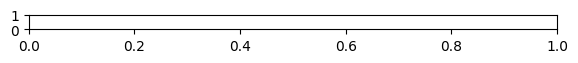

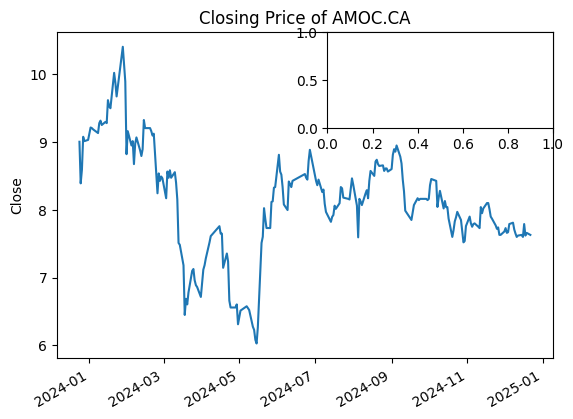

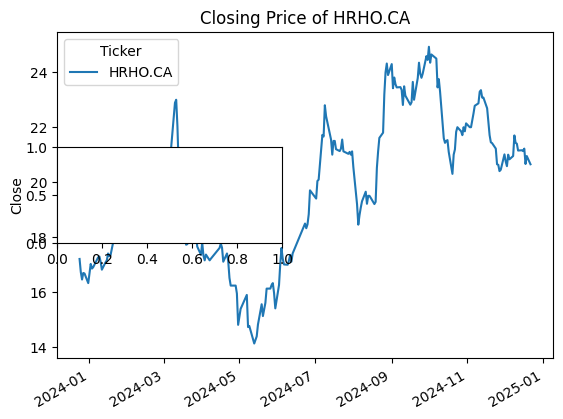

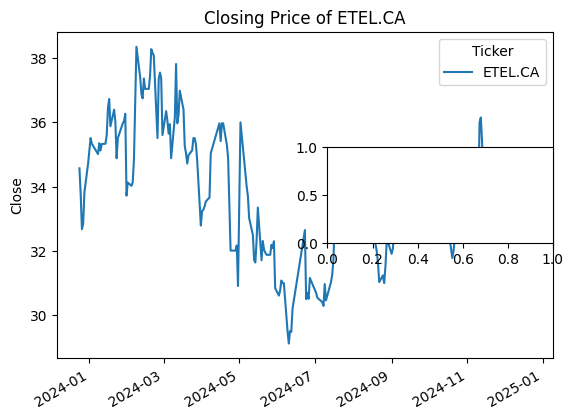

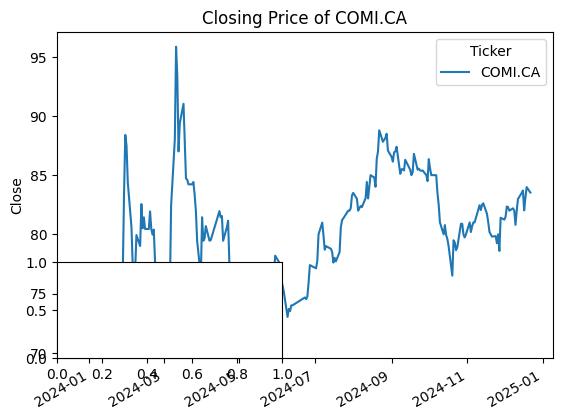

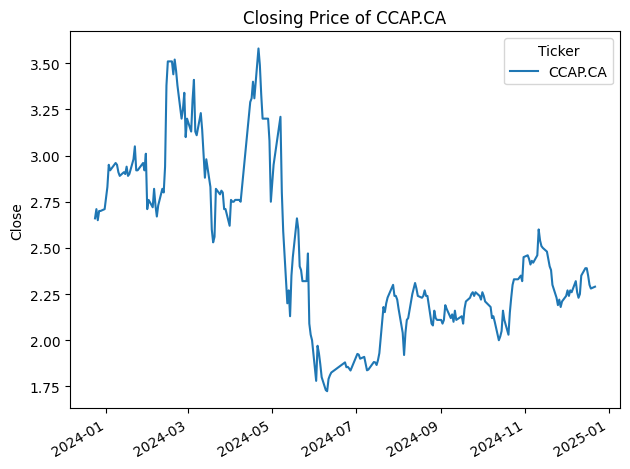

In [14]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_data, 1):
    plt.subplot(3, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks[i - 1]}")
    
plt.tight_layout()

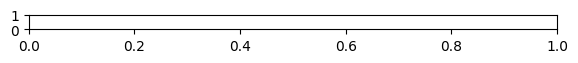

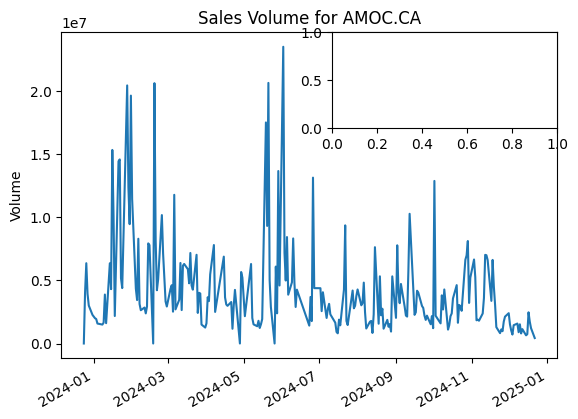

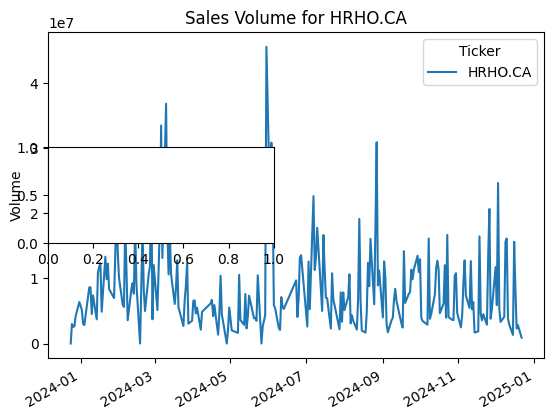

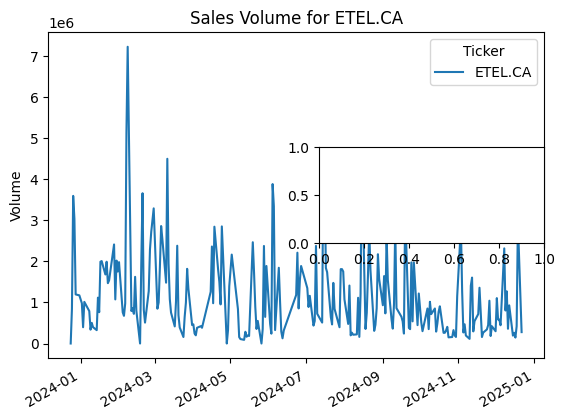

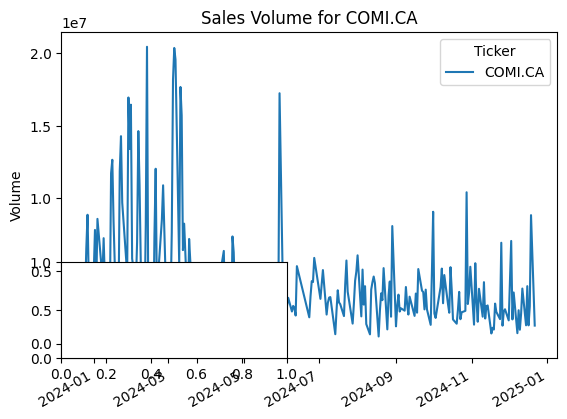

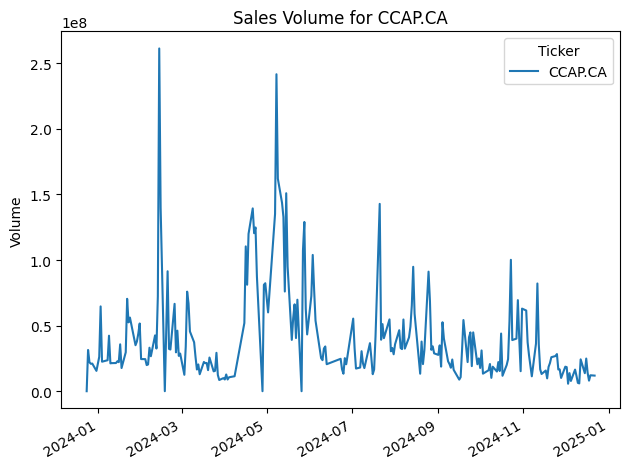

In [15]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_data, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stocks[i - 1]}")
    
plt.tight_layout()

In [16]:
# Function to preprocess the stock data (focus on closing prices)
def preprocess_data(stock_data):
    # Use 'Close' price for training the LSTM model
    stock_data = stock_data[['Close']]
    
    # Normalize the data using MinMaxScaler (scaling between 0 and 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data.values)
    
    return scaled_data, scaler
# Preprocess data for each stock
scaled_data = {}
scalers = {}
for stock in stocks:
    scaled_data[stock], scalers[stock] = preprocess_data(data[stock])

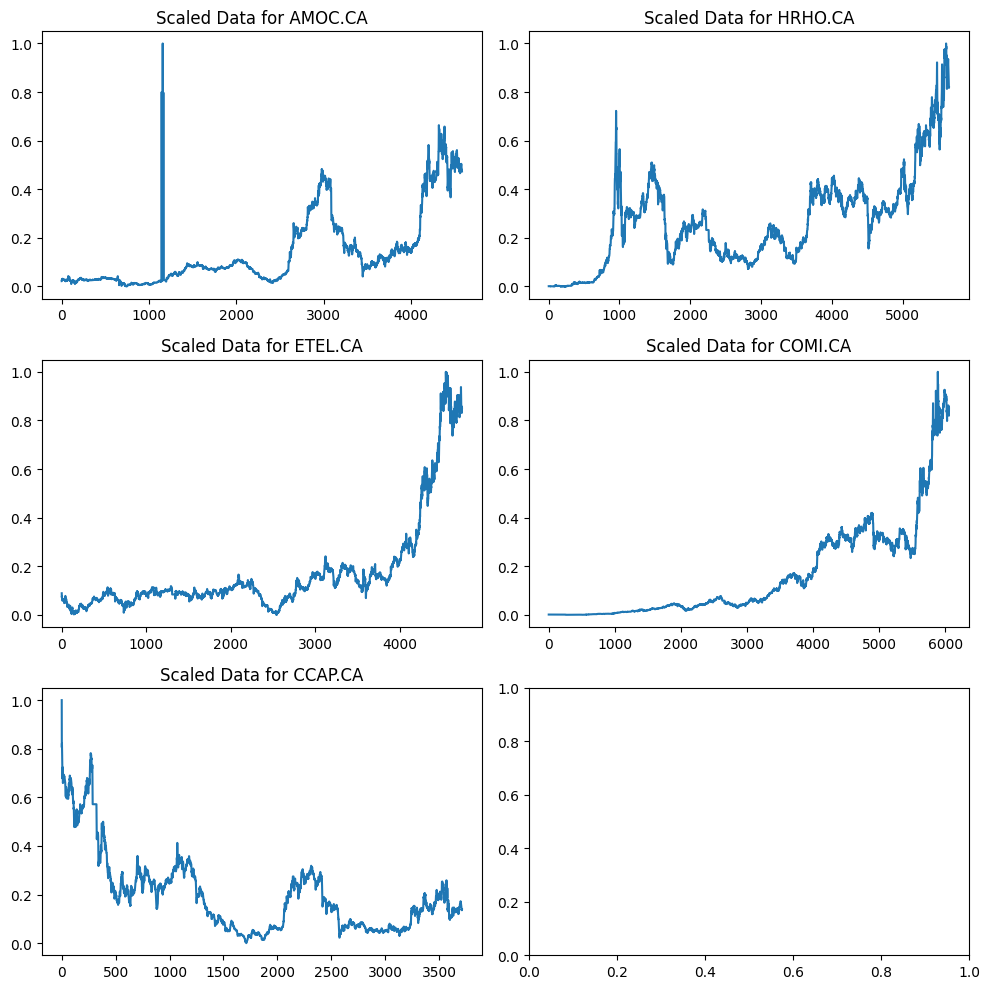

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Adjust the grid size as needed
axs = axs.ravel()  # Flatten the 2D array of axes for easier access

for i, stock in enumerate(stocks):
    axs[i].plot(scaled_data[stock])
    axs[i].set_title(f'Scaled Data for {stock}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [18]:
#Create an empty list to store the adjusted close price data for each stock
adjusted_close_data = []

# Loop over each stock and extract the Adjusted Close price
for stock in stocks:
    stock_data = data[stock]
    
    # Reset index to have Date as a column (if needed)
    stock_data = stock_data.reset_index()
    
    # Use 'Adj Close' if available, otherwise fall back to 'Close'
    if 'Adj Close' in stock_data.columns:
        stock_data = stock_data[['Date', 'Adj Close']].rename(columns={'Adj Close': stock})
    else:
        stock_data = stock_data[['Date', 'Close']].rename(columns={'Close': stock})
    
    # Append each stock's data to the list
    adjusted_close_data.append(stock_data)

# Merge all stock data into one DataFrame on the 'Date' column
df_combined = adjusted_close_data[0]
for stock_data in adjusted_close_data[1:]:
    df_combined = pd.merge(df_combined, stock_data, on='Date', how='outer')

# Set the Date column as the index
df_combined.set_index('Date', inplace=True)

# Display the combined DataFrame
print(df_combined.head())

Price      AMOC.CA HRHO.CA ETEL.CA   COMI.CA CCAP.CA
Ticker     AMOC.CA HRHO.CA ETEL.CA   COMI.CA CCAP.CA
Date                                                
2000-11-27     NaN     NaN     NaN  0.418611     NaN
2000-11-28     NaN     NaN     NaN  0.418611     NaN
2000-11-29     NaN     NaN     NaN  0.418611     NaN
2000-11-30     NaN     NaN     NaN  0.403823     NaN
2000-12-03     NaN     NaN     NaN  0.403823     NaN


C:\Users\m_ibrahim_moh\AppData\Local\Temp\ipykernel_4928\4278131614.py:23: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_combined = pd.merge(df_combined, stock_data, on='Date', how='outer')


## **Average Daily Return**

In [19]:
stocks

['AMOC.CA', 'HRHO.CA', 'ETEL.CA', 'COMI.CA', 'CCAP.CA']

In [20]:
Daily_Returns = []  # List to store the results

# Calculate the daily return
for stock in stocks:
    # Assuming data[stock] is a DataFrame containing 'Close' column
    data[stock]['Daily Return'] = data[stock]['Close'].pct_change()
    
    # Calculate the average daily return
    average_daily_return = data[stock]['Daily Return'].mean()
    
    # Create a formatted string for the result and append to the list
    result = f"The average daily return for the {stock} stock is: {average_daily_return * 100:.2f}%"
    Daily_Returns.append(result)

# Print all the results
for result in Daily_Returns:
    print(result)


The average daily return for the AMOC.CA stock is: 0.89%
The average daily return for the HRHO.CA stock is: 0.13%
The average daily return for the ETEL.CA stock is: 0.06%
The average daily return for the COMI.CA stock is: 0.11%
The average daily return for the CCAP.CA stock is: -0.01%


In [21]:
data['AMOC.CA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4587 entries, 2005-09-29 to 2024-11-28
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, AMOC.CA)   4587 non-null   float64
 1   (High, AMOC.CA)    4587 non-null   float64
 2   (Low, AMOC.CA)     4587 non-null   float64
 3   (Open, AMOC.CA)    4587 non-null   float64
 4   (Volume, AMOC.CA)  4587 non-null   int64  
 5   (Daily Return, )   4586 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 250.9 KB


## **#Plotting the Stock Data**

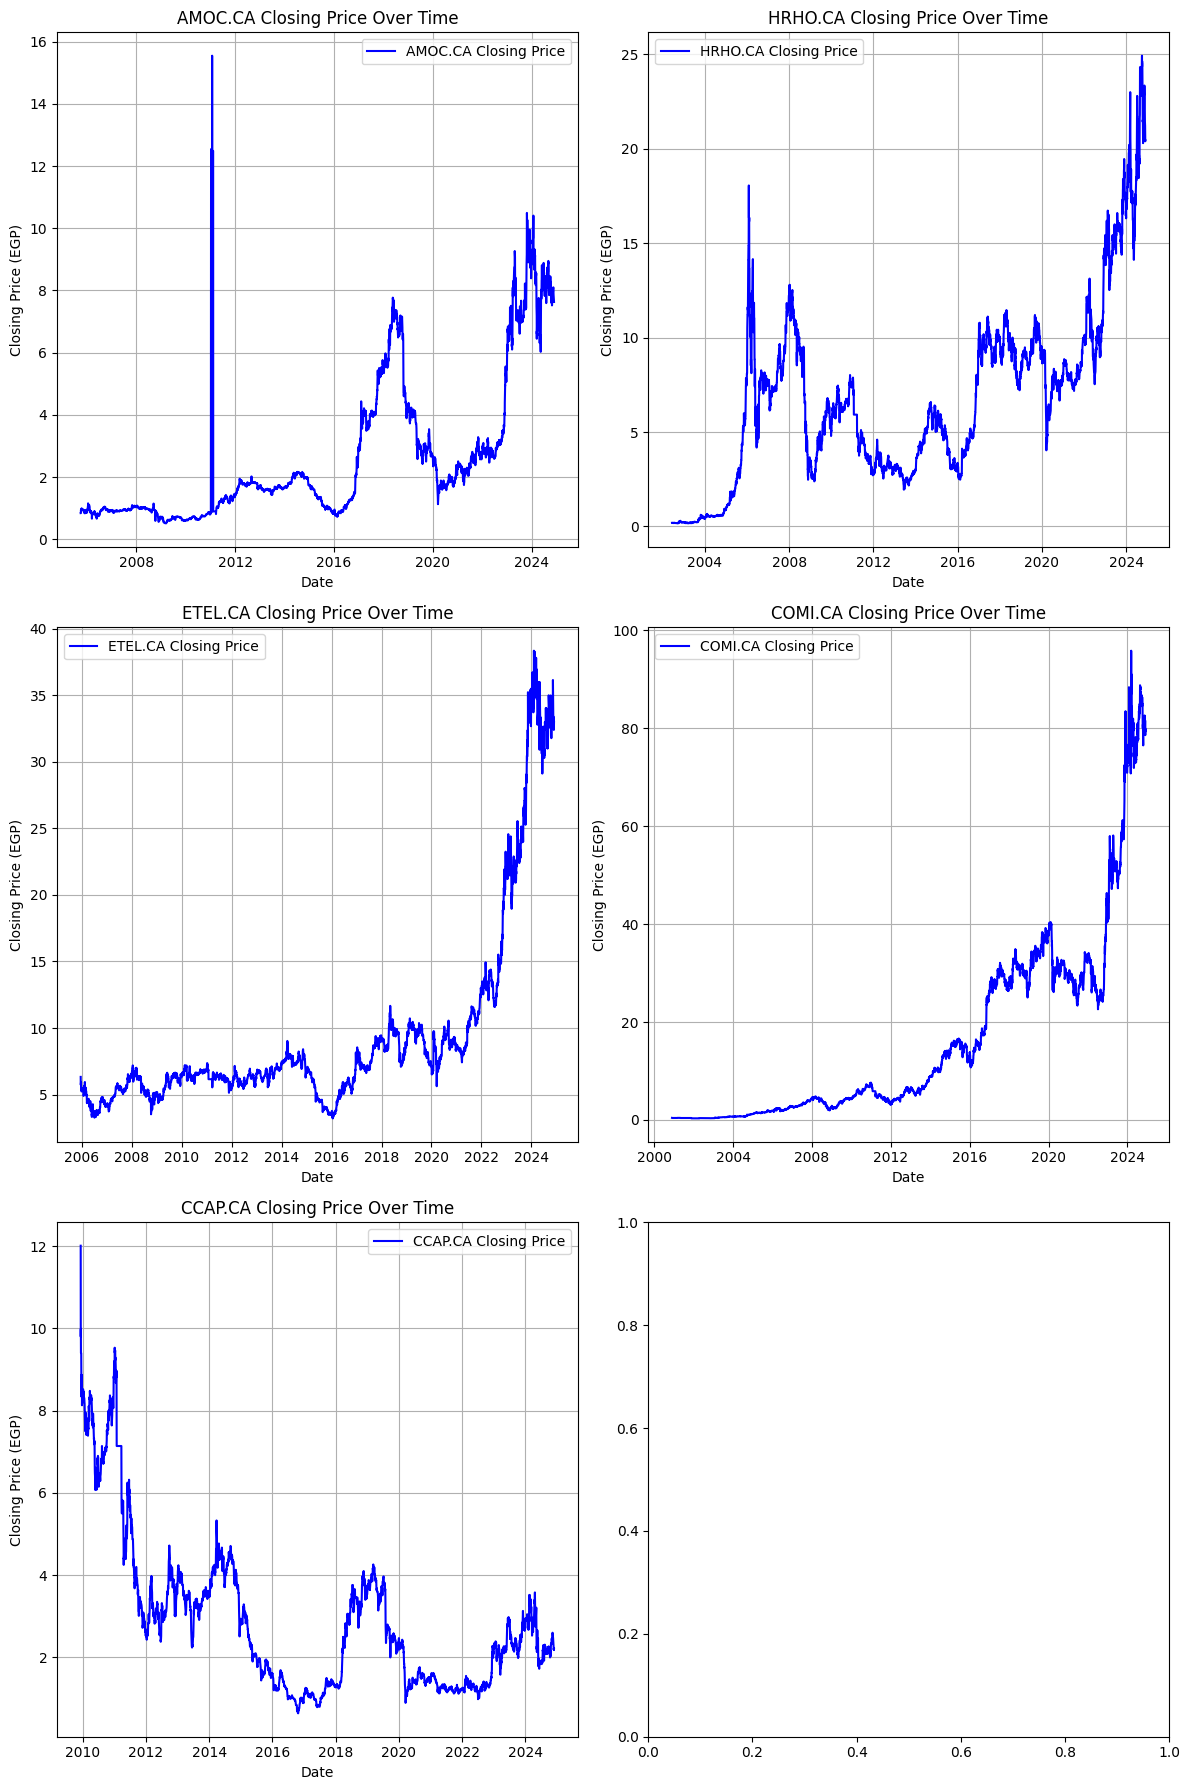

In [22]:
# Function to plot the Closing Price over time
def plot_stock_data(stock_data, stock_name, ax):
    ax.plot(stock_data['Close'], label=f'{stock_name} Closing Price', color='blue')
    ax.set_title(f'{stock_name} Closing Price Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price (EGP)')
    ax.legend()
    ax.grid(True)

# Create a grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 18))  # Adjust the number of rows and columns as needed
axs = axs.ravel()  # Flatten the 2D array of axes


# Plot data for each stock
for i, stock in enumerate(stocks):
    plot_stock_data(data[stock], stock, axs[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [23]:
stocks

['AMOC.CA', 'HRHO.CA', 'ETEL.CA', 'COMI.CA', 'CCAP.CA']

## **#Moving Average**

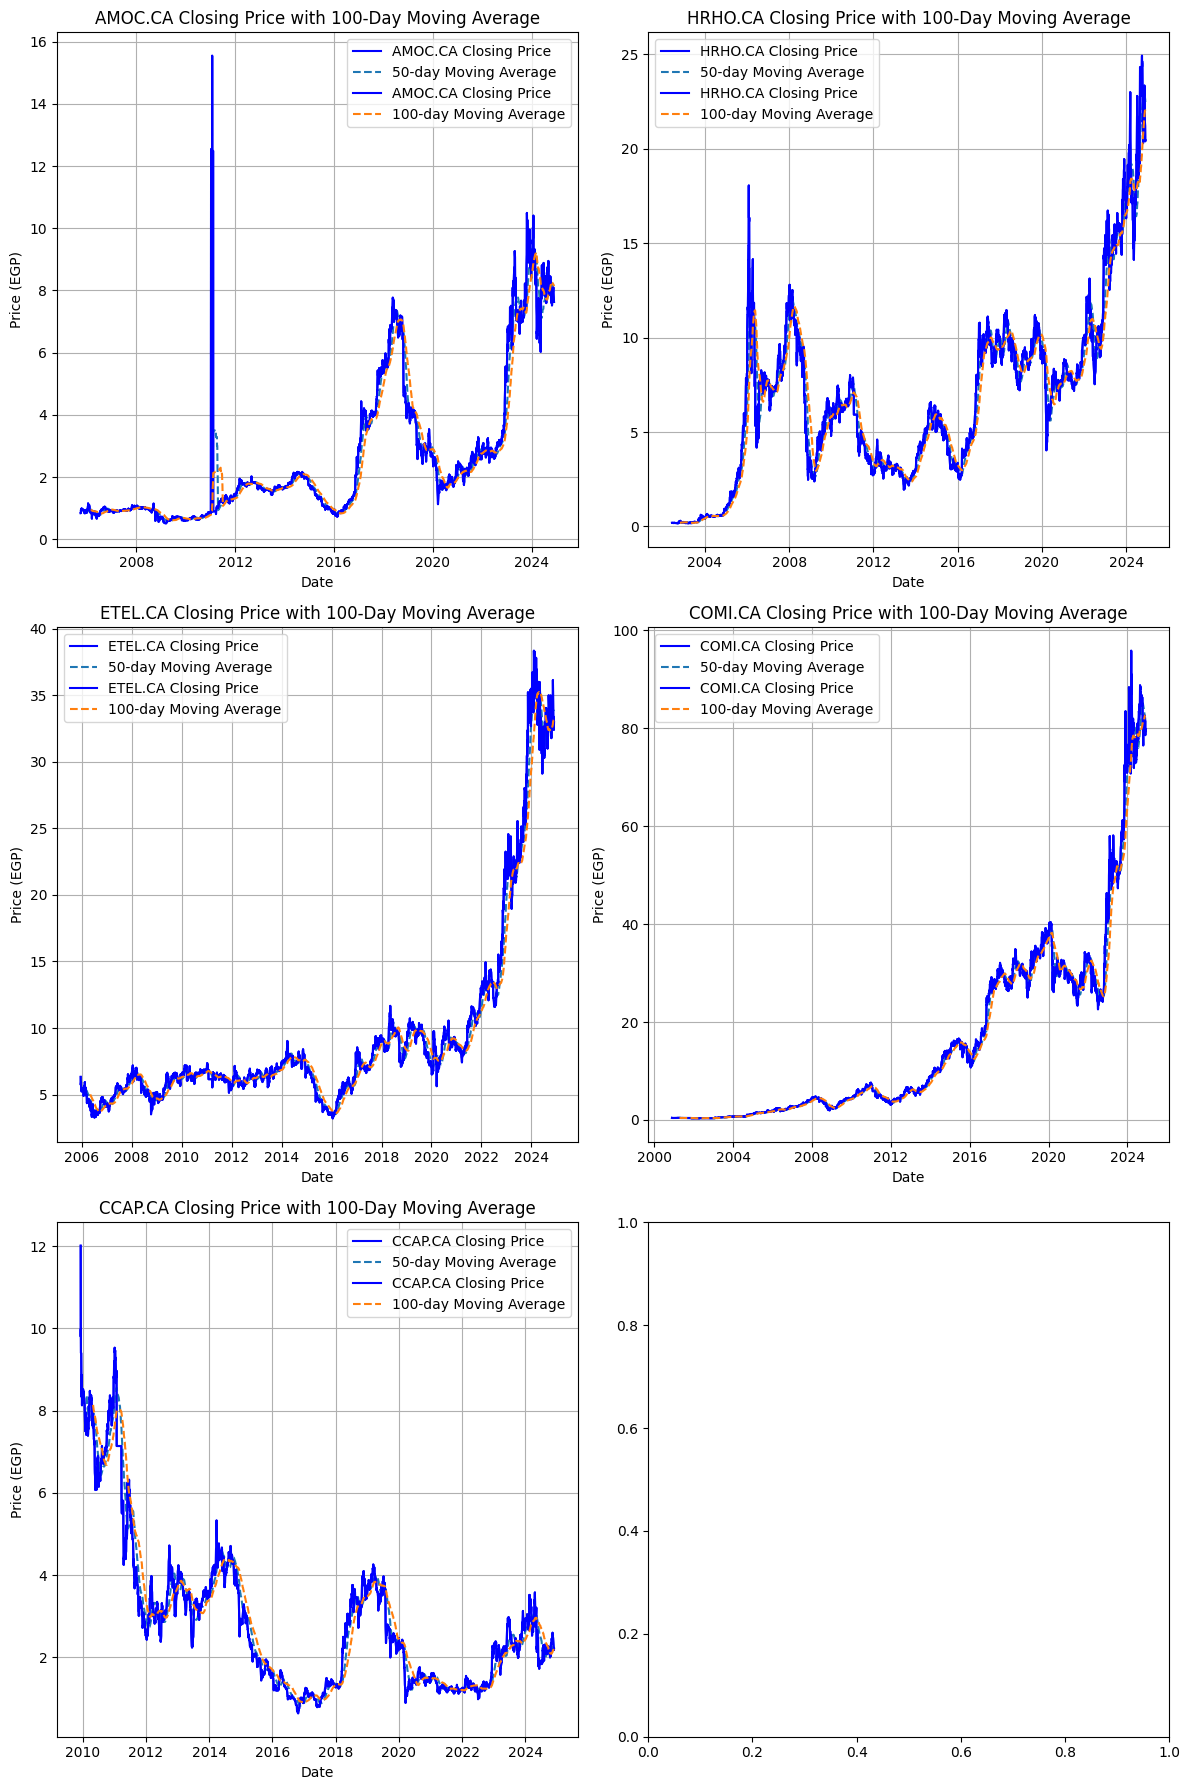

In [24]:
# Function to plot the Closing Price with Rolling Mean
def plot_rolling_mean(stock_data, stock_name, window=50, ax=None):
    rolling_mean = stock_data['Close'].rolling(window=window).mean()

    # If ax is provided, plot on the given axes, otherwise create a new figure
    ax.plot(stock_data['Close'], label=f'{stock_name} Closing Price', color='blue')
    ax.plot(rolling_mean, label=f'{window}-day Moving Average', linestyle='--')
    ax.set_title(f'{stock_name} Closing Price with {window}-Day Moving Average')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (EGP)')
    ax.legend()
    ax.grid(True)


# Create a grid of subplots (adjust the number of rows and columns based on the number of stocks)
fig, axs = plt.subplots(3, 2, figsize=(12, 18))  # Adjust the size as needed
axs = axs.ravel()  # Flatten the 2D array of axes for easier access

# Plot data for each stock
for i, stock in enumerate(stocks):
    plot_rolling_mean(data[stock], stock, window=50, ax=axs[i])
    plot_rolling_mean(data[stock], stock, window=100, ax=axs[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Volume ##

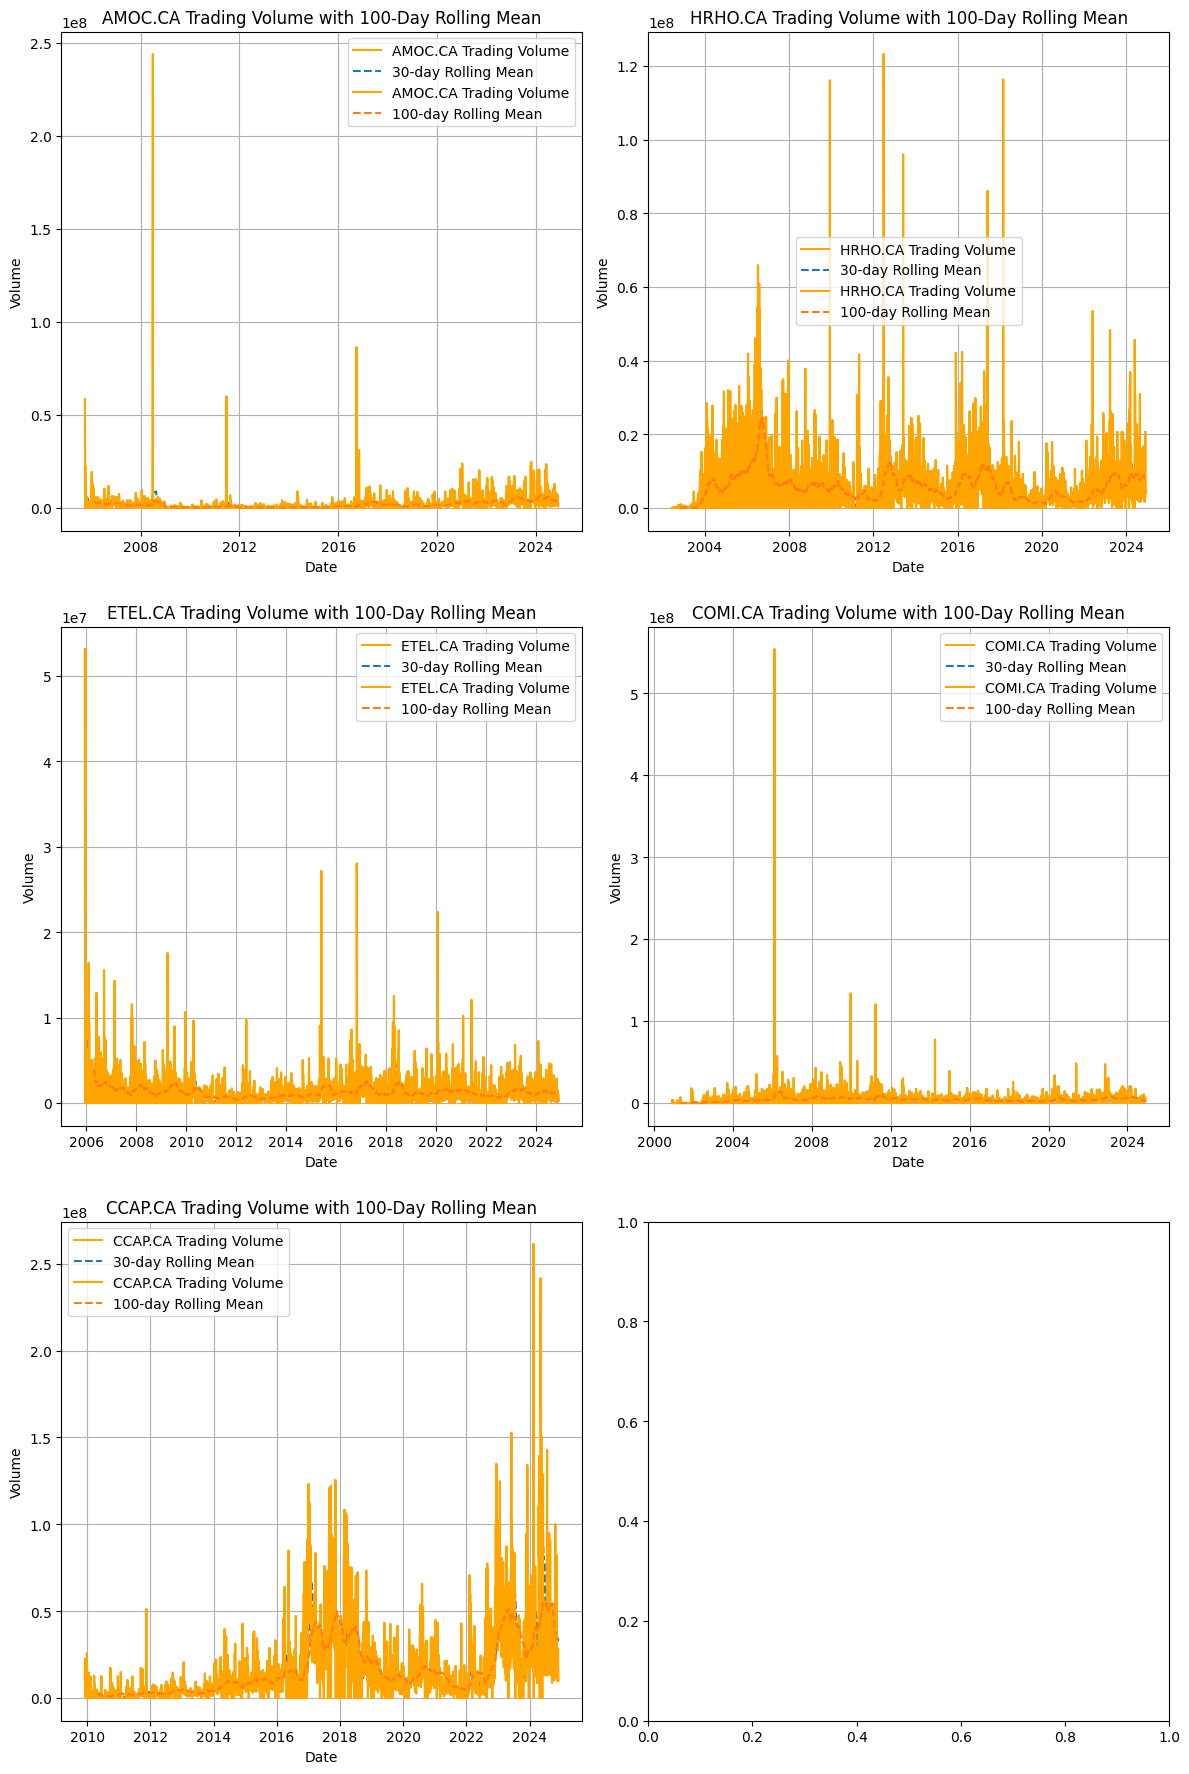

In [25]:
# Function to plot the Trading Volume with Rolling Mean
def plot_Volume(stock_data, stock_name, window=30, ax=None):
    rolling_mean = stock_data['Volume'].rolling(window=window).mean()

    # If ax is provided, plot on the given axes, otherwise create a new figure
    ax.plot(stock_data['Volume'], label=f'{stock_name} Trading Volume', color='orange')
    ax.plot(rolling_mean, label=f'{window}-day Rolling Mean', linestyle='--')
    ax.set_title(f'{stock_name} Trading Volume with {window}-Day Rolling Mean')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.legend()
    ax.grid(True)

# List of stock names to plot
stocks = ['AMOC.CA', 'HRHO.CA', 'ETEL.CA', 'COMI.CA', 'CCAP.CA']

# Create a grid of subplots (adjust the number of rows and columns based on the number of stocks)
fig, axs = plt.subplots(3, 2, figsize=(12, 18))  # Adjust the size as needed
axs = axs.ravel()  # Flatten the 2D array of axes for easier access

# Plot data for each stock
for i, stock in enumerate(stocks):
    plot_Volume(data[stock], stock, window=30, ax=axs[i])
    plot_Volume(data[stock], stock, window=100, ax=axs[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [26]:
stocks

['AMOC.CA', 'HRHO.CA', 'ETEL.CA', 'COMI.CA', 'CCAP.CA']

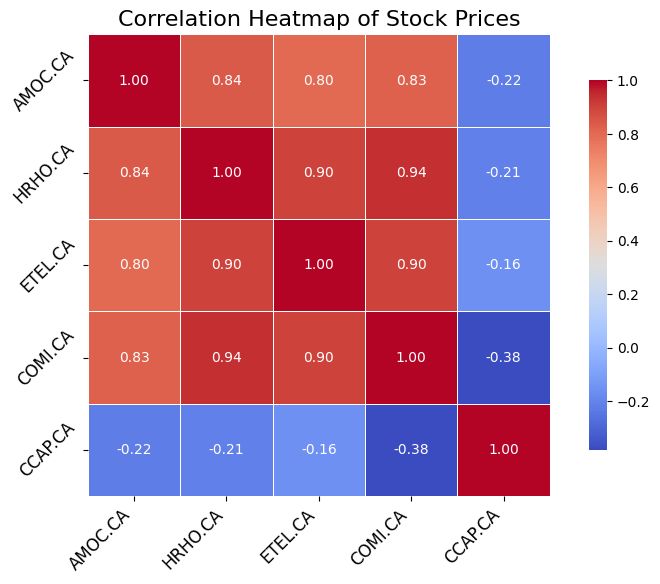

In [27]:

def plot_correlation_heatmap(data, stock_names):
    # Extract closing prices for each stock and ensure the index is aligned
    closing_prices = pd.DataFrame()

    # Add closing prices for each stock to the DataFrame
    for stock in stock_names:
        closing_prices[stock] = data[stock]['Close']

    # Drop rows with missing values (if any)
    closing_prices = closing_prices.dropna()

    # Compute the correlation matrix
    correlation_matrix = closing_prices.corr()

    # Plot the heatmap with more customization
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Heatmap of Stock Prices', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels to avoid overlap
    plt.yticks(rotation=45, ha='right', fontsize=12)  # Rotate y-axis labels to avoid overlap
    plt.show()

plot_correlation_heatmap(data, stocks)


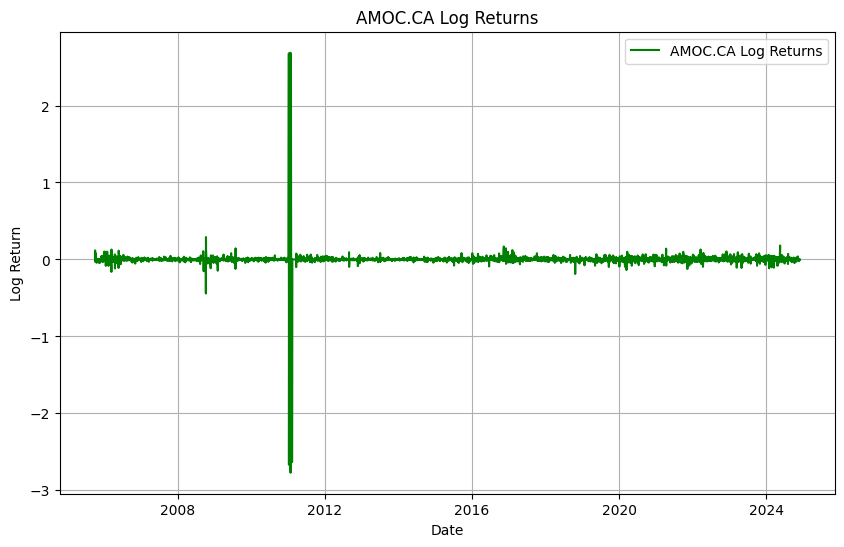

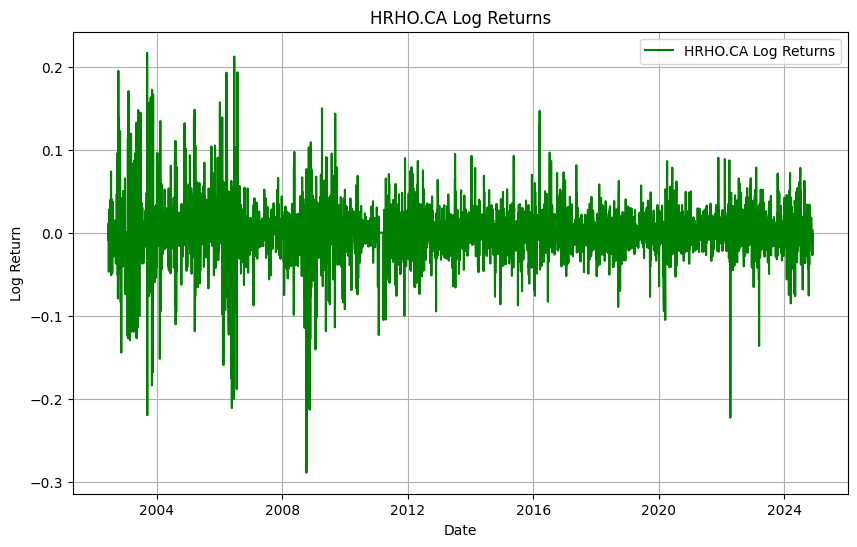

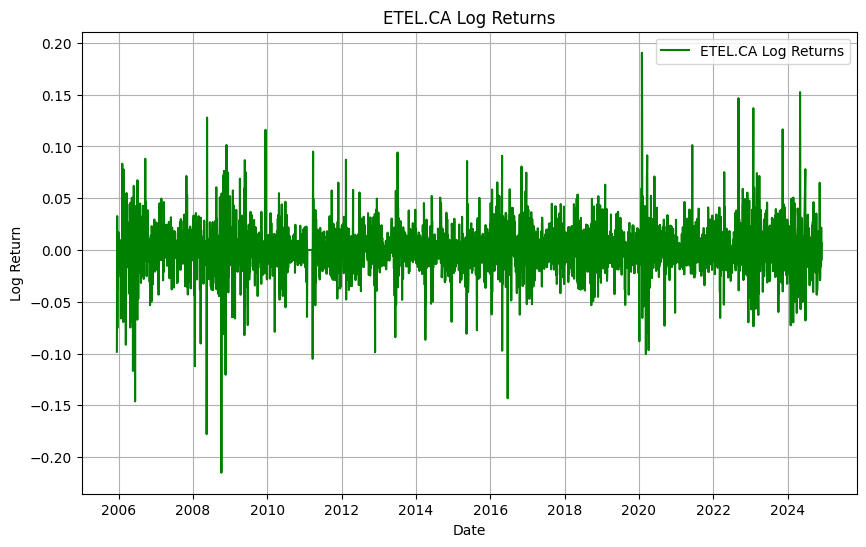

In [28]:
def plot_returns(stock_data, stock_name):
    # Calculate log returns
    stock_data['Log Returns'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))

    # Plot log returns
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Log Returns'], label=f'{stock_name} Log Returns', color='green')
    plt.title(f'{stock_name} Log Returns')
    plt.xlabel('Date')
    plt.ylabel('Log Return')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_returns(data['AMOC.CA'], 'AMOC.CA')
plot_returns(data['HRHO.CA'], 'HRHO.CA')
plot_returns(data['ETEL.CA'], 'ETEL.CA')

In [29]:
stocks

['AMOC.CA', 'HRHO.CA', 'ETEL.CA', 'COMI.CA', 'CCAP.CA']

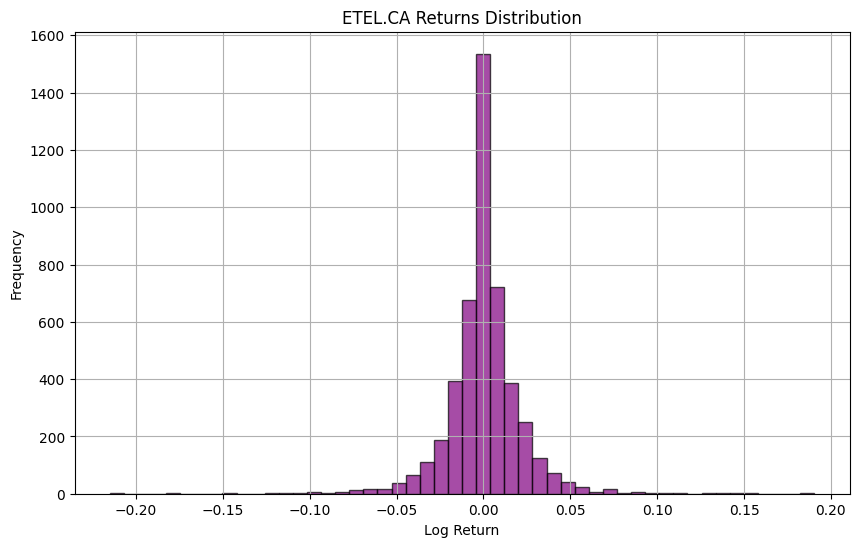

In [30]:
def plot_returns_histogram(stock_data, stock_name, bins=50):
    # Plot histogram of returns
    plt.figure(figsize=(10, 6))
    plt.hist(stock_data['Log Returns'].dropna(), bins=bins, color='purple', edgecolor='black', alpha=0.7)
    plt.title(f'{stock_name} Returns Distribution')
    plt.xlabel('Log Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histogram for log returns of 'ETEL.CA'
plot_returns_histogram(data['ETEL.CA'], 'ETEL.CA')

In [31]:
stocks

['AMOC.CA', 'HRHO.CA', 'ETEL.CA', 'COMI.CA', 'CCAP.CA']

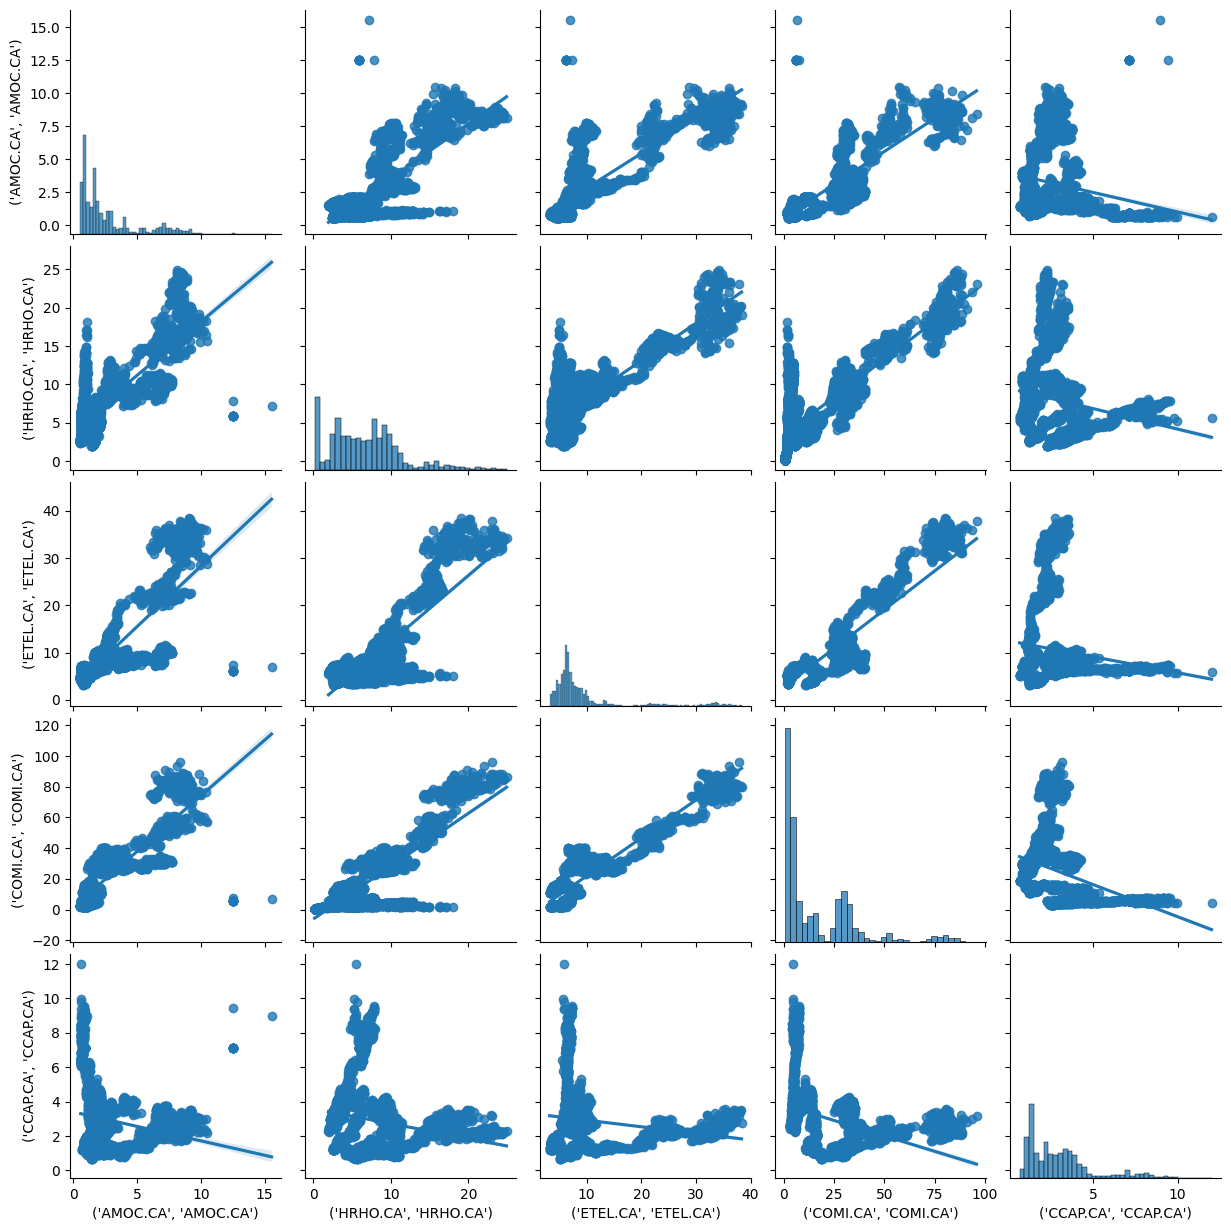

In [32]:
sns.pairplot(pd.DataFrame(df_combined),kind='reg')
plt.show()

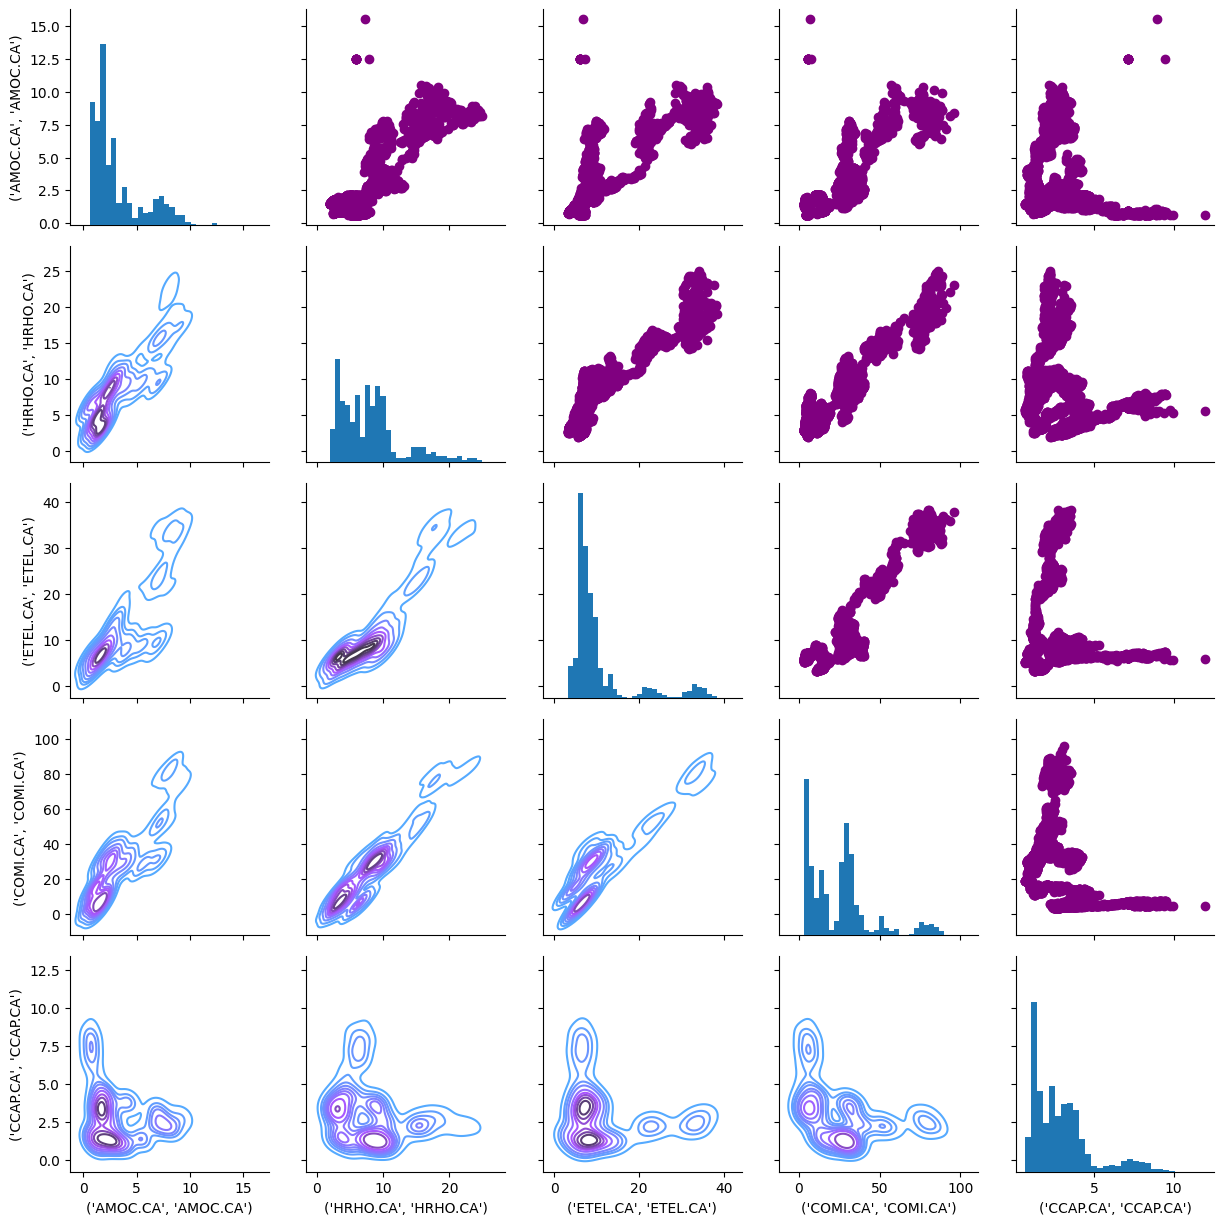

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(df_combined.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [34]:
stocks

['AMOC.CA', 'HRHO.CA', 'ETEL.CA', 'COMI.CA', 'CCAP.CA']

In [35]:
df_combined.columns

MultiIndex([('AMOC.CA', 'AMOC.CA'),
            ('HRHO.CA', 'HRHO.CA'),
            ('ETEL.CA', 'ETEL.CA'),
            ('COMI.CA', 'COMI.CA'),
            ('CCAP.CA', 'CCAP.CA')],
           names=['Price', 'Ticker'])

## **How much value do we put at risk by investing in a particular stock?**

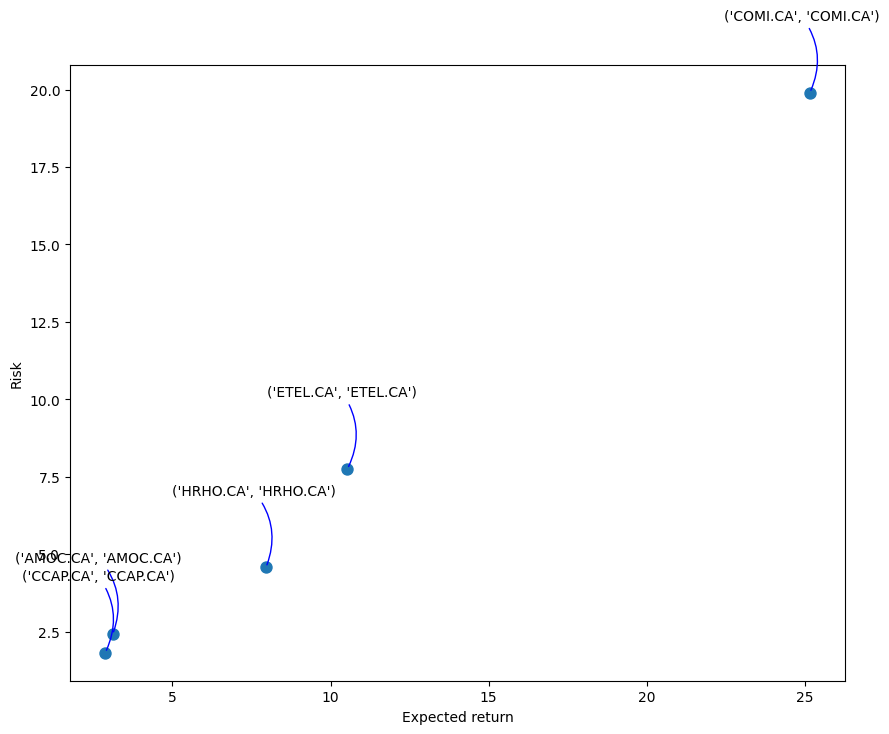

In [36]:
rets = df_combined.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

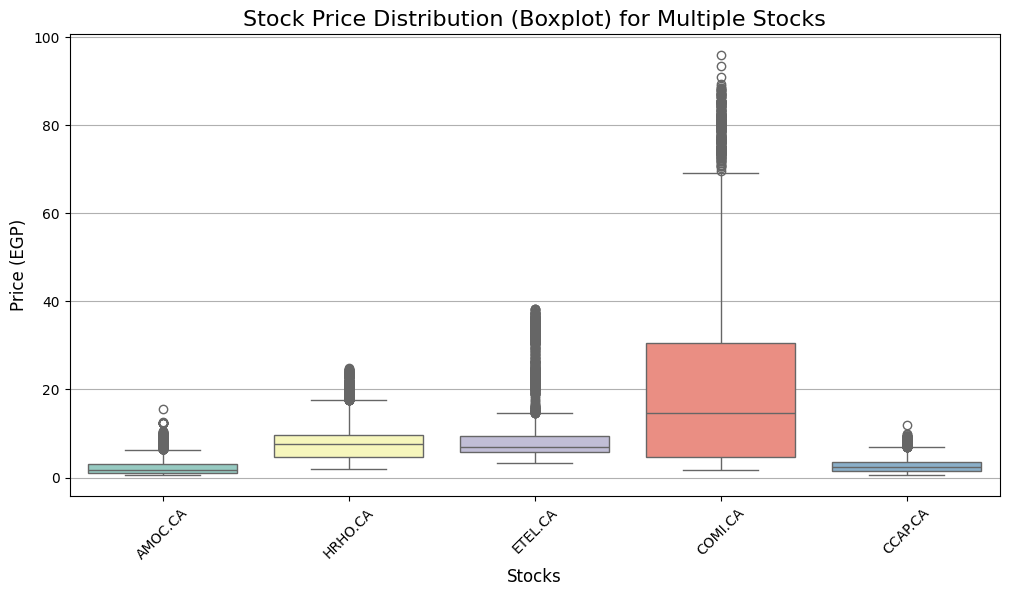

In [37]:

def plot_multiple_boxplots(data, stock_names):
    # Create a DataFrame to hold the data for plotting
    boxplot_data = pd.DataFrame()

    # Populate the DataFrame with 'Close' prices for each stock
    for stock in stock_names:
        if 'Close' in data[stock].columns:
            boxplot_data[stock] = data[stock]['Close']
        else:
            print(f"Warning: 'Close' column not found for {stock}")

    # Create a boxplot for all the stocks in the list
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=boxplot_data, palette="Set3")
    
    # Add title and labels
    plt.title('Stock Price Distribution (Boxplot) for Multiple Stocks', fontsize=16)
    plt.xlabel('Stocks', fontsize=12)
    plt.ylabel('Price (EGP)', fontsize=12)
    
    # Show grid and plot
    plt.grid(True, axis='y')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

plot_multiple_boxplots(data, stocks)




## **5. Prepare Data for LSTM Model**

In [38]:
# Function to create dataset for LSTM (X_train, y_train) based on time steps
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare datasets for each stock
time_step = 60  # Use past 60 days to predict the next day
X_train, y_train = {}, {}
for stock in stocks:
    X_train[stock], y_train[stock] = create_dataset(scaled_data[stock], time_step)
    
    # Reshaping data for LSTM input: [samples, time steps, features]
    X_train[stock] = np.reshape(X_train[stock], (X_train[stock].shape[0], X_train[stock].shape[1], 1))

# Display shape of training data
print(X_train[stocks[0]].shape)


(4526, 60, 1)


## **6. Build the LSTM Model**

In [39]:
# Function to build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50,activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.1))
    model.add(LSTM(units=60,activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=80, activation='relu',return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=120, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(units=1))  # Output layer for predicted stock price
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build and train LSTM model for each stock
models = {}
for stock in stocks:
    model = build_lstm_model((X_train[stock].shape[1], 1))
    model.fit(X_train[stock], y_train[stock], epochs=10, batch_size=32, verbose=1)
    models[stock] = model


c:\Users\m_ibrahim_moh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0111
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0033
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0034
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0024
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 0.0024
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - loss: 0.0020
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 0.0025
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - loss: 0.0021
Epoch 9/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0024
Epoch 10/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0016
Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0211
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.0027
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 0.0023
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0025
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━

## **7. Evaluate the Model and Compare Predictions**

142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


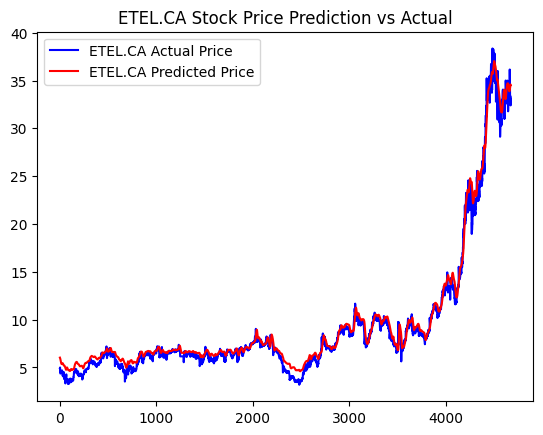

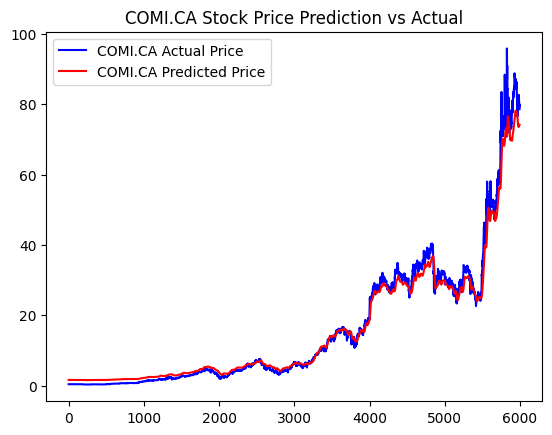

RMSE for AMOC.CA: 0.5194498952654963
RMSE for HRHO.CA: 0.5980972344772582
RMSE for ETEL.CA: 0.778562926613665
RMSE for COMI.CA: 2.4708060501006393
RMSE for CCAP.CA: 0.23928939275025213


In [40]:
# Function to inverse scale the predictions and actual values
def inverse_transform(scaler, data):
    return scaler.inverse_transform(data)

# Make predictions and compare
predictions = {}
for stock in stocks:
    # Predict using the trained model
    predicted_stock_price = models[stock].predict(X_train[stock])
    
    # Inverse transform to get actual stock prices
    predicted_stock_price = inverse_transform(scalers[stock], predicted_stock_price)
    actual_stock_price = inverse_transform(scalers[stock], y_train[stock].reshape(-1, 1))
    
    predictions[stock] = {
        'predicted': predicted_stock_price,
        'actual': actual_stock_price
    }

# Plot the predictions vs actual for the stock
plt.plot(predictions[stocks[2]]['actual'], color='blue', label=f'{stocks[2]} Actual Price')
plt.plot(predictions[stocks[2]]['predicted'], color='red', label=f'{stocks[2]} Predicted Price')
plt.title(f'{stocks[2]} Stock Price Prediction vs Actual')
plt.legend()
plt.show()
plt.plot(predictions[stocks[3]]['actual'], color='blue', label=f'{stocks[3]} Actual Price')
plt.plot(predictions[stocks[3]]['predicted'], color='red', label=f'{stocks[3]} Predicted Price')
plt.title(f'{stocks[3]} Stock Price Prediction vs Actual')
plt.legend()
plt.show()

# Calculate RMSE for each stock
for stock in stocks:
    rmse = np.sqrt(mean_squared_error(predictions[stock]['actual'], predictions[stock]['predicted']))
    print(f'RMSE for {stock}: {rmse}')


In [49]:
models

{'AMOC.CA': <Sequential name=sequential, built=True>,
 'HRHO.CA': <Sequential name=sequential_1, built=True>,
 'ETEL.CA': <Sequential name=sequential_2, built=True>,
 'COMI.CA': <Sequential name=sequential_3, built=True>,
 'CCAP.CA': <Sequential name=sequential_4, built=True>}

In [51]:
model = models['CCAP.CA']

In [53]:
model.save('my_model1.keras')